# Explore here

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle


In [170]:
data = pd.read_csv('/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/data/raw/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [171]:
# Obtener las dimensiones.
data.shape

(48895, 16)

In [172]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     


- Existen un total de 48895 filas (en este caso, alquileres) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `Price`.
- Las variables `last_review` y `reviews_per_month` solo tiene 38843 instancias con valores, por lo que contendría más de 10000 valores nulos. El resto de variables cuentan siempre con valor.
- Los datos cuentan con 9 características numéricas y 5 características categóricas.


In [173]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(0)

In [174]:
# Eliminar información irrelevante.
data_limpia = data.drop(['id', 'name', 'host_name', 'latitude', 'host_id', 'longitude', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis = 1, inplace = False)
data_limpia.head()


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,Private room,149,1,365
1,Manhattan,Midtown,Entire home/apt,225,1,355
2,Manhattan,Harlem,Private room,150,3,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,0


In [175]:
# PRIEMRA AUTOMATIZACION: Utilizare este codigo para visualizar en graficos todas las columnas de manera mas clara.

# for col in data_limpia:
#     sns.histplot(x=col,data=data,kde=True)
#     plt.tight_layout()                          
#     plt.show()

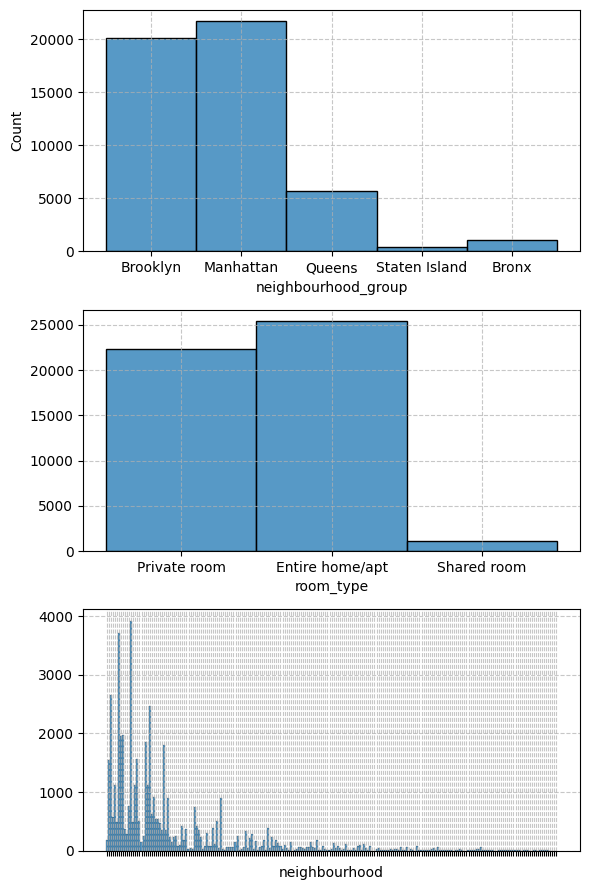

In [176]:
# Análisis sobre variables categóricas
# Histograma múltiple.
                                                    
fig, axis = plt.subplots(3, 1, figsize = (6, 9))

sns.histplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data_limpia, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_limpia, x = "neighbourhood").set(ylabel = None)
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)
axis[2].grid(linestyle='--', alpha=0.7)

axis[2].set_xticklabels([]) # Elimina las etiquetas del eje X

plt.tight_layout()
plt.show()


- **neighbourhood_group**: Podemos obserbar que la mayoria de los alquileres se llevan acabo en las ciudades de Brooklyn y Manhattan.
- **room_type**: La gran mayoria de esos alquileres son de habitaciones privadas o casas/apt enteros. 

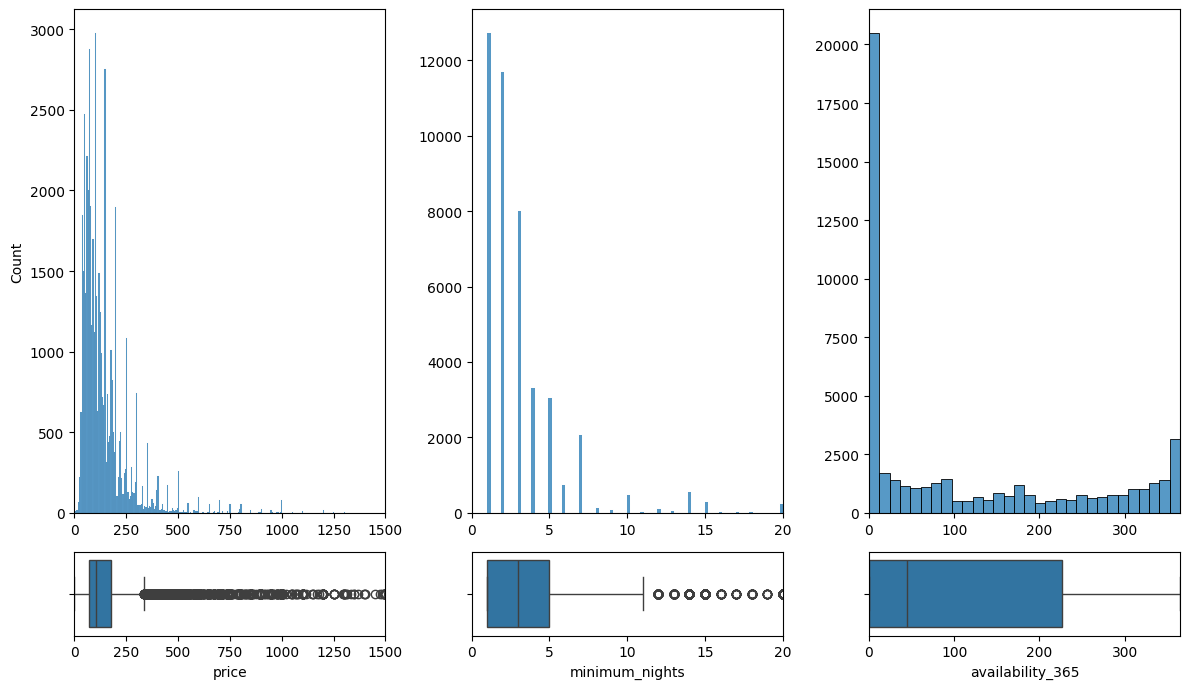

In [177]:
# Análisis sobre variables numéricas
# Figura múltiple con histogramas y diagramas de caja.

fig, axis = plt.subplots(2, 3, figsize = (12, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "availability_365")

axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

plt.tight_layout()
plt.show()


In [178]:
# # SEGUNDA PARTE DE LA AUTOMATIZACION: GRAFICAR VARIABLES NUMERICAS

# # Esta variable filtrará el data frame y me devolverá los indices de las columnas numericas. 
# column_filter = data_limpia.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# # Crear la figura con 1 columnas y 2 filas por variable.
# fig, axis = plt.subplots(len(column_filter) * 2, 1, figsize=(8, len(column_filter) * 7))

# # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
# # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
# x_limits = {
#     'price': (0, 1500),   # Rango para el histograma y el boxplot de columna1...
#     'minimum_nights': (0, 20),    
#     'availability_365': (0, 400),     
#     # Añadir más columnas y rangos si es necesario...
# }

# # Iterar sobre cada columna del DataFrame
# for i, col in enumerate(column_filter):
#     index = i * 2
#     # Histograma en la primera fila
#     sns.histplot(data = data_limpia, x = col, kde = True, ax = axis[index])
#     axis[index].set_title(f'Histogram of {col}')
    
#     # Establecer límites del eje x para el histograma
#     if col in x_limits:
#         axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

#     # Boxplot en la segunda fila
#     sns.boxplot(data = data_limpia, x = col, ax = axis[index + 1])
#     axis[index + 1].set_title(f'Boxplot of {col}')
    
#     # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
#     if col in x_limits:
#         axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

# plt.tight_layout()
# plt.show()


- **Price**: Podemos obserbar que tiene una distribución de poisson en la que la mayoria de los valores se acumulan entre los 0 y 500 dolares, estando ahi su media, bien sesgada a la izquierda, pero que podemos tambien obserbar que hay muchos valores outlier. (Se paga de media unos 100 dolares por alquiler).
- **Minimum nigths and availability**: En estas dos gráficas podemos obserbar una distribución geométrica con las medias sesgadas al lado izquierdo donde los valores son menores. (Suelen darse alquileres con una media de 3 días y estar disponibles unos 40 días al año).


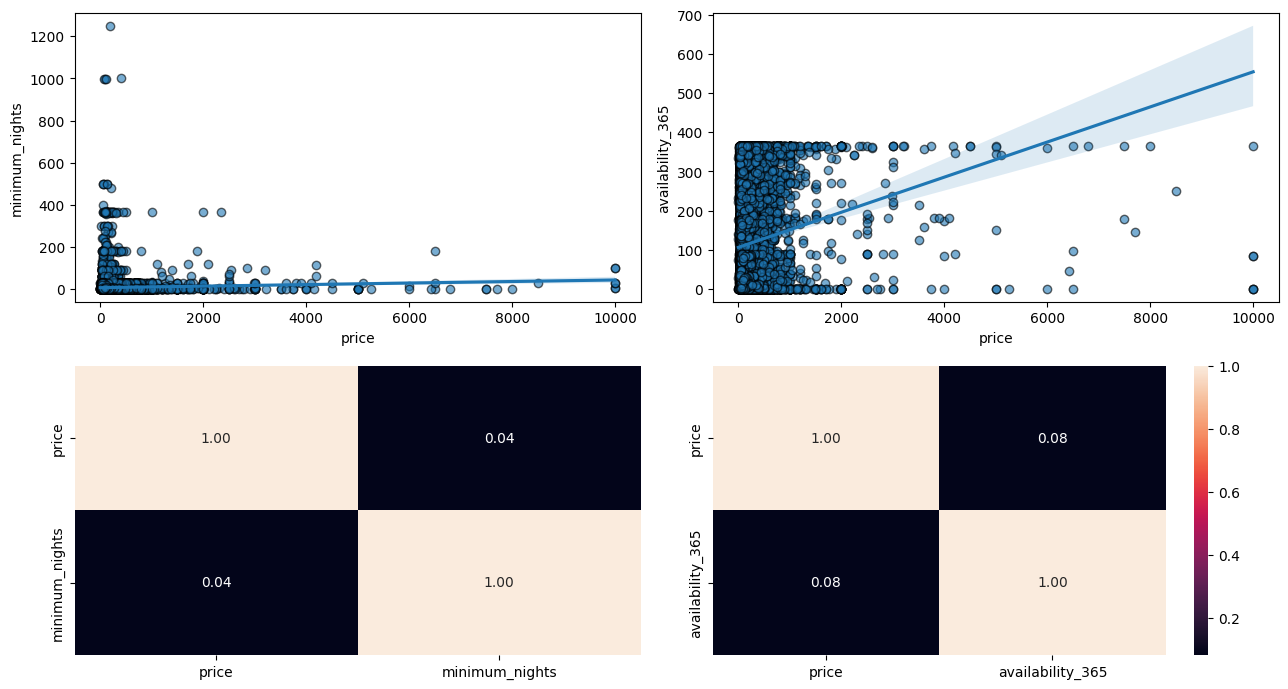

In [179]:
# Análisis numérico-numérico
# Diagrama de dispersión múltiple.

fig, axis = plt.subplots(2, 2, figsize = (13, 7))

sns.regplot(ax = axis[0, 0], data = data_limpia, x = "price", y = "minimum_nights", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "price", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

In [180]:
# # TERCERA PARTE DE LA AUTOMATIZACION: ANALISIS NUMERICO-NUMERICO

# objective = 'price'

# # Esta variable filtrará el data frame y me devolverá los índices de las columnas numéricas.
# column_filter = data_limpia.select_dtypes(include='number').drop(columns=[objective], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# # Crear una figura con 1 columna y 2 filas por cada variable
# fig, axis = plt.subplots(len(column_filter) * 2, 1, figsize=(8, (len(column_filter) * 5)))

# # Crear un diagrama de dispersión múltiple
# for i, col in enumerate(column_filter):
#     # Regplot en la primera fila (fila 2*i)
#     sns.regplot(ax = axis[i * 2], data = data_limpia, x = objective, y = col)
#     axis[i * 2].set_title(f'Regplot of {col} vs {objective}')
    
#     # Heatmap en la segunda fila.
#     sns.heatmap(data_limpia[[col, objective]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
#     axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {objective}')

# plt.tight_layout()
# plt.show()




La relación que existe entre el Precio y las noches minimas de estancia es minima y completamente normal. Por otro lado podemos eobserbar una relación tambien muy sutil pero algo mayor entre el precio y la disponibilidad de las estancias, sinedo mayor el orecio de las estancias con mas disponibilidad, podemos intuir que al ser mas caras se alquilan menos o menos personas pueden acceder a pagarlas. 

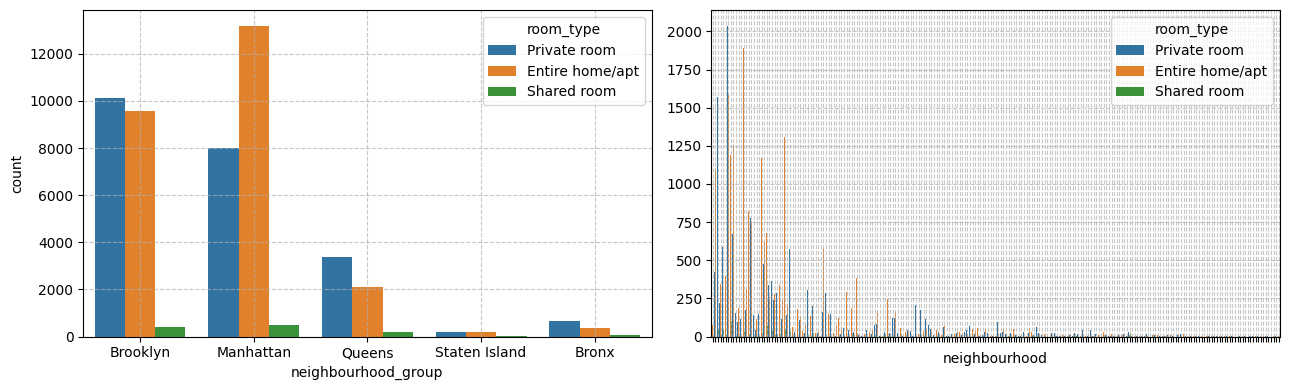

In [181]:
# Análisis categórico-categórico

fig, axis = plt.subplots(figsize = (13, 4), ncols = 2)

sns.countplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data_limpia, x = "neighbourhood", hue = "room_type").set(ylabel = None)

axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

axis[1].set_xticklabels([]) # Elimina las etiquetas del eje X

plt.tight_layout()
plt.show()

In [182]:
# CUARTA PARTE DE LA AUTOMATIZACION: ANALISIS CATEGORICO-CATEGORICO










En este caso el análisis de las variables categóricas entre si no seria necesario y no nos aportaria ninguna idea, puesto que el target de esrte EDA es una variable numérica y estos grafico no nos dan información sobre el precio de los alquileres. 

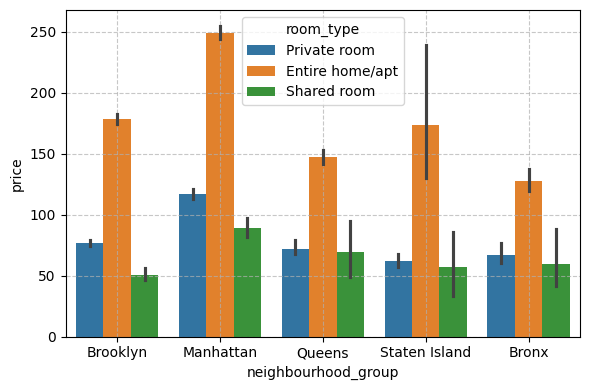

In [183]:
# Combinaciones de la clase con varias predictoras

plt.figure(figsize = (6, 4))
sns.barplot(data_limpia, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos obserbar que, como es de esperar, los precios de las viviendas que se alquilan enteras son superiores, pero que los precios de las habitaciones privadasy compartidas son muy pareceidos, y es por ese motivo que las habitaciones compartidas se alquilan muchisimo menos que las privadas. 

In [184]:
# Análisis de correlaciones.

# Factorización.

data_limpia["neighbourhood_group_n"] = pd.factorize(data_limpia["neighbourhood_group"])[0]

data_limpia["room_type_n"] = pd.factorize(data_limpia["room_type"])[0]

data_limpia["neighbourhood_n"] = pd.factorize(data_limpia["neighbourhood"])[0]

# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in data_limpia[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}

room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in data_limpia[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

neighbourhood_transformation_rules = {row["neighbourhood_n"]: row["neighbourhood"] for _, row in data_limpia[["neighbourhood_n", "neighbourhood"]].drop_duplicates().iterrows()}

# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "neighbourhood_group": neighbourhood_group_transformation_rules,
    "room_type": room_type_transformation_rules,
    "neighbourhood": neighbourhood_transformation_rules,
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)

data_limpia.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,Brooklyn,Kensington,Private room,149,1,365,0,0,0
1,Manhattan,Midtown,Entire home/apt,225,1,355,1,1,1
2,Manhattan,Harlem,Private room,150,3,365,1,0,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,194,0,1,3
4,Manhattan,East Harlem,Entire home/apt,80,10,0,1,1,4


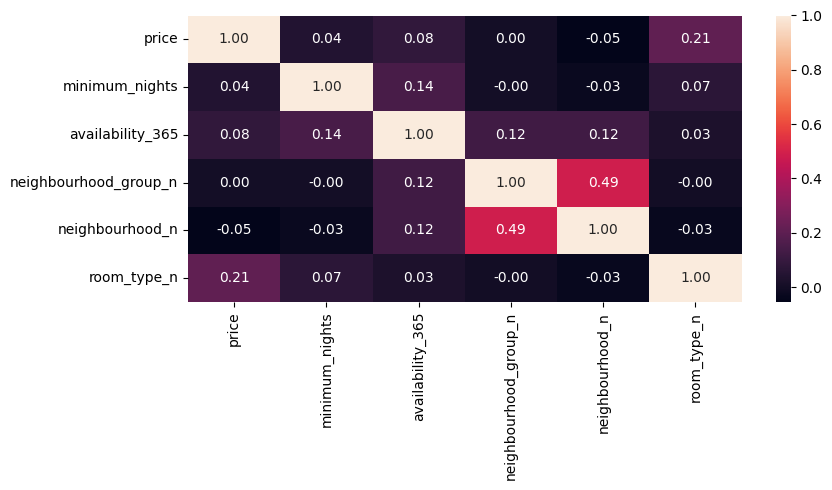

In [185]:
# Matriz de correlaciones.

fig, axis = plt.subplots(figsize = (9, 5))

sns.heatmap(data_limpia[["price", "minimum_nights", "availability_365", "neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [186]:
# # QUINTA PARTE DE LA AUTOMATIZACION: MATRIZ DE CORRELACION

# corr_matrix = data_limpia.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

# plt.figure(figsize=(9, 5))  
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths = 0.5)

# plt.tight_layout()
# plt.show()

Obserbamos dos relaciones relevantes, por un lado, como tinen sentido, hay una relacion bastante evidente entre el tipo de habitación que se alquila y su precio, y por otro lado observamos la relacion mas grande de la matriz entre las ciudades y sus resoectivos barrios. 

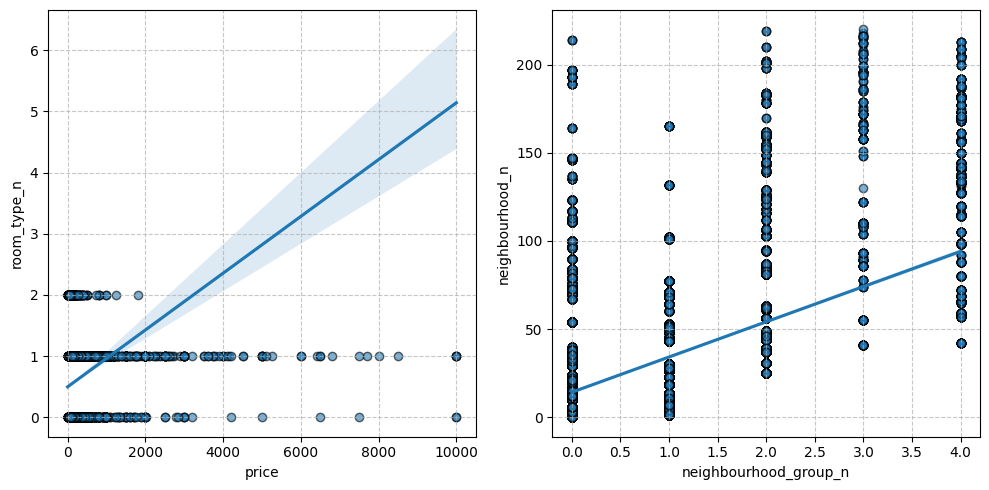

In [187]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:
# Existe una relación entre Precio y Room_type, como es lógico y también entre neighbourhood_group y neighbourhood.

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "price", y = "room_type_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "neighbourhood_group_n", y = "neighbourhood_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Como obseravamos en la anterior matriz de correlaciones, vemos en este gráfico como los precios de las habitaciones tiene una diferencia relevante entre si son por un lado privadas o casas completas o por otro lado habitaciones compartidas.  

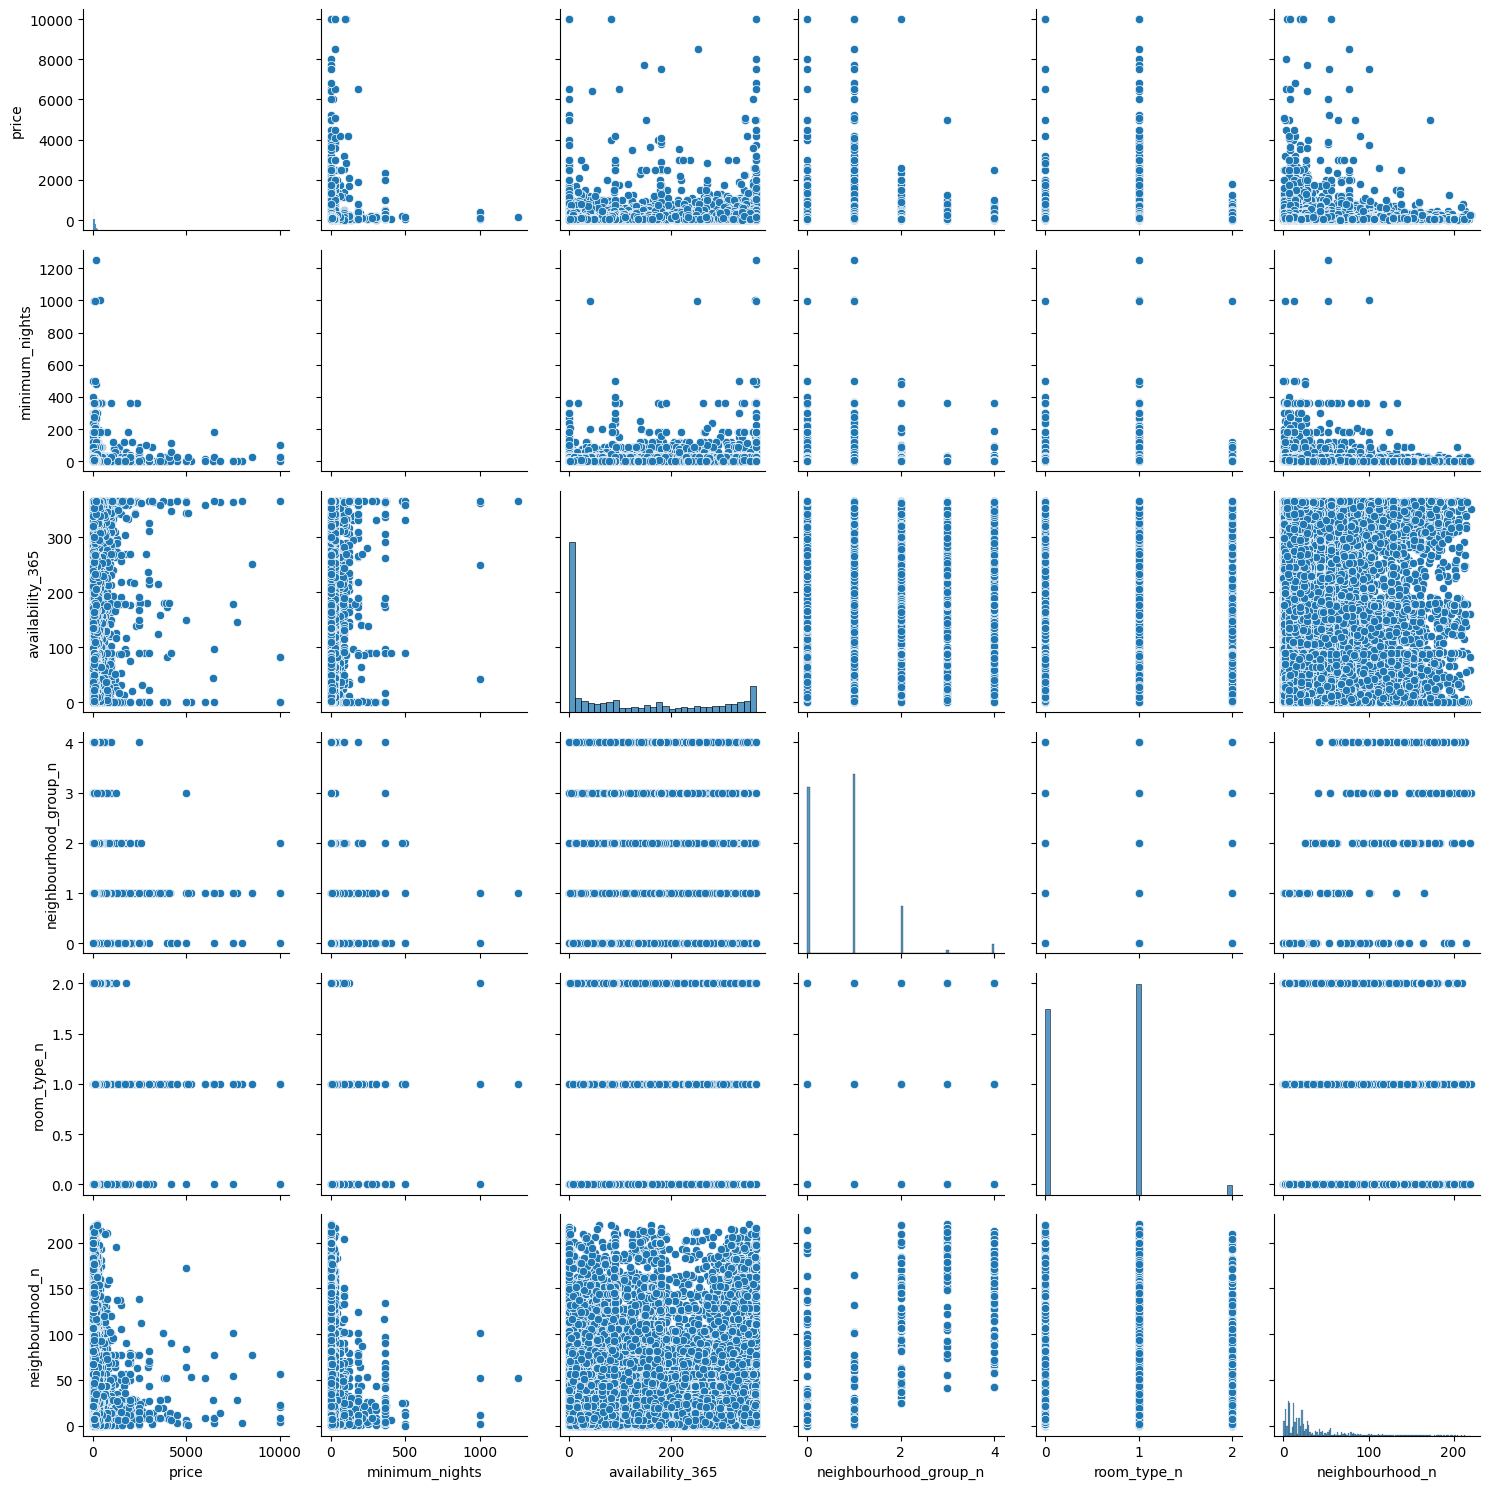

In [188]:
sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

In [189]:
# Ingeniería de características.
# Análisis de outliers.
# Análisis descriptivo.

data_limpia.describe()

,price,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,112.781327,0.786911,0.567113,29.888782
std,240.154170,20.510550,131.622289,0.844386,0.541249,34.676634
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,365.000000,4.000000,2.000000,220.000000


cjhasbviasudbviasodnvpodsaibnvsdialfbnsda

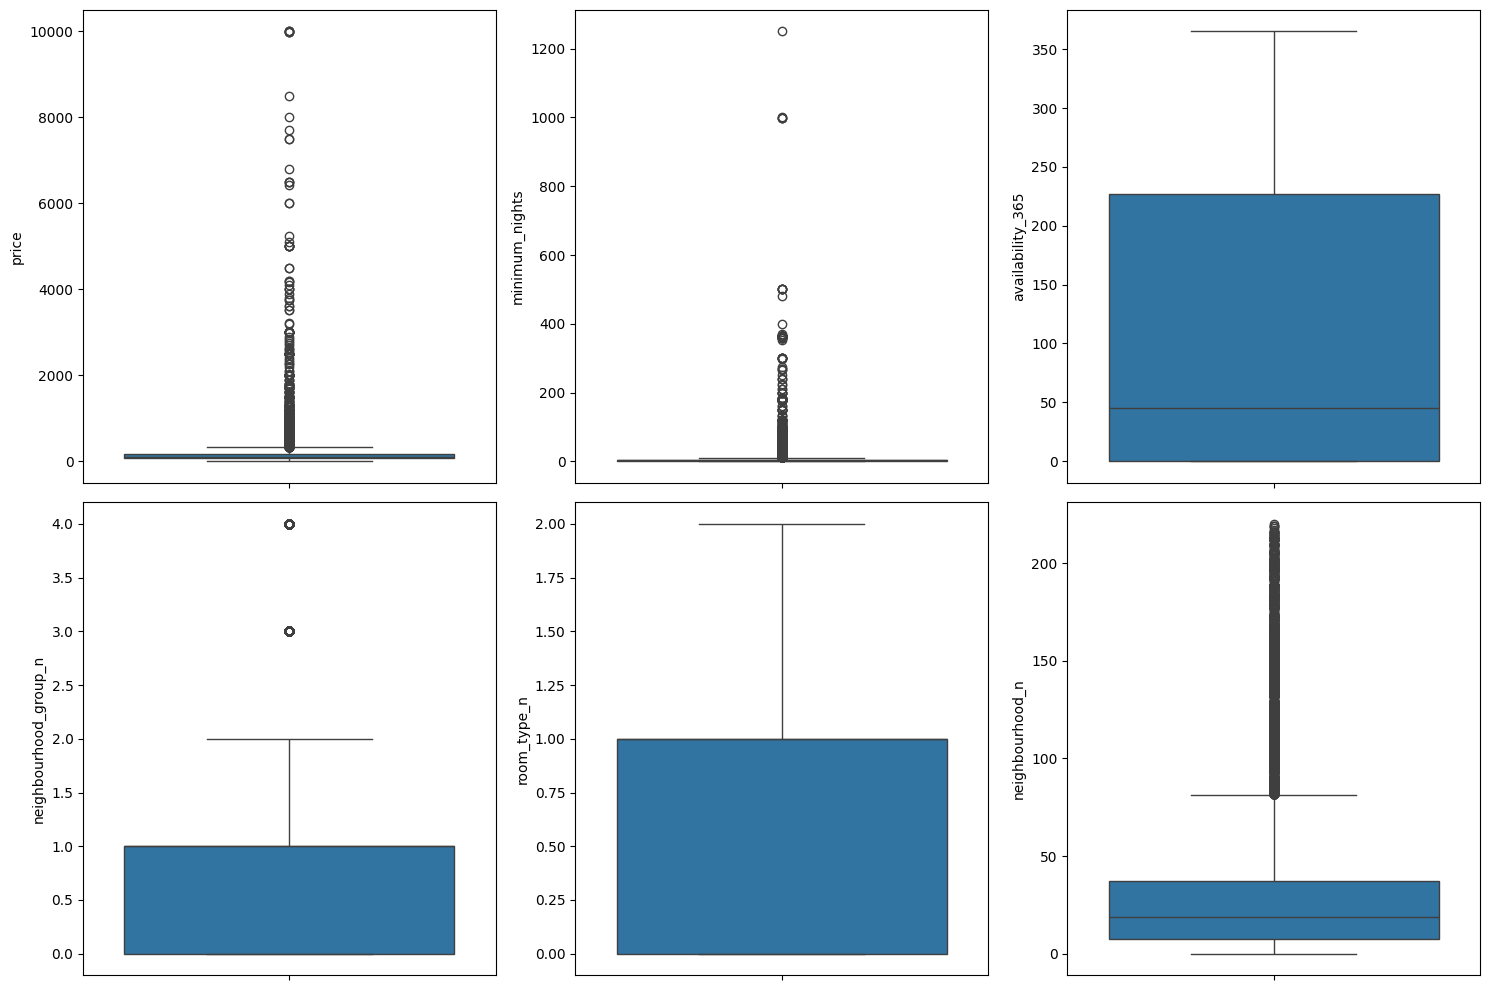

In [190]:
# Diagramas de cajas de las variables para observar los valores atípicos (outliers).

fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_limpia, y = "price")
sns.boxplot(ax = axis[0, 1], data = data_limpia, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data_limpia, y = "availability_365")
sns.boxplot(ax = axis[1, 0], data = data_limpia, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[1, 1], data = data_limpia, y = "room_type_n")
sns.boxplot(ax = axis[1, 2], data = data_limpia, y = "neighbourhood_n")

plt.tight_layout()
plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son `price`, `minimum_nights`, `neighbourhood_n` y `neighbourhood_group_n`. En el caso de las variables `price`, `minimum_nights` y `neighbourhood_group_n` parece que puede haber valores que no sean comunes y sería necesario comporbarlo. 


In [191]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ["price", "minimum_nights", "neighbourhood_group_n", "neighbourhood_n"]:
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'price': [0, np.float64(334.0)],
 'minimum_nights': [0, np.float64(11.0)],
 'neighbourhood_group_n': [0, np.float64(2.5)],
 'neighbourhood_n': [0, np.float64(81.25)]}

In [192]:
# Análisis de valores faltantes

data_limpia_con_outliers.isnull().sum().sort_values(ascending=False)


neighbourhood_group      0
neighbourhood            0
room_type                0
price                    0
minimum_nights           0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [193]:
data_limpia_sin_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group      0
neighbourhood            0
room_type                0
price                    0
minimum_nights           0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [194]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

from sklearn.model_selection import train_test_split

num_variables = ["minimum_nights", "availability_365", "neighbourhood_group_n", "room_type_n", "neighbourhood_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_limpia_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = data_limpia_sin_outliers.drop("price", axis = 1)[num_variables]
y = data_limpia_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
32645,3,1,0,1,12
23615,2,0,1,0,30
31183,2,0,0,0,6
29260,3,267,0,1,6
7275,5,0,2,0,31


In [195]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/models/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/models/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
32645,-0.193025,-0.852862,-0.931915,0.798949,-0.514100
23615,-0.239596,-0.860447,0.256169,-1.050482,0.005517
31183,-0.239596,-0.860447,-0.931915,-1.050482,-0.687306
29260,-0.193025,1.164663,-0.931915,0.798949,-0.687306
7275,-0.099884,-0.860447,1.444253,-1.050482,0.034385


In [196]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/models/scaler_con_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_con_outliers, file)
  
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/models/scaler_sin_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/Machine-learning-python-template_Project_12_Julian_Lopez/Machine-learning-python-template_Project_12_Julian_Lopez/src/excels/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
32645,0.001601,0.002740,0.00,0.5,0.054545
23615,0.000801,0.000000,0.25,0.0,0.136364
31183,0.000801,0.000000,0.00,0.0,0.027273
29260,0.001601,0.731507,0.00,0.5,0.027273
7275,0.003203,0.000000,0.50,0.0,0.140909


In [197]:
X_train_con_outliers
X_train_sin_outliers
X_test_con_outliers
X_test_sin_outliers
y_train
y_test
X_train_con_outliers_norm
X_test_con_outliers_norm
X_train_sin_outliers_norm
X_test_sin_outliers_norm
X_train_con_outliers_scal
X_test_con_outliers_scal
X_train_sin_outliers_scal
X_test_sin_outliers_scal

,minimum_nights,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
879,0.2,0.517808,0.0,0.5,0.000000
44383,1.0,0.200000,0.8,0.0,0.541538
15394,0.1,0.000000,0.4,0.0,0.086154
43230,0.1,0.745205,0.4,0.5,0.529231
16332,0.1,0.082192,0.4,0.5,0.049231
...,...,...,...,...,...
20477,0.1,0.186301,0.4,0.5,0.233846
44969,0.0,0.805479,0.4,0.0,0.012308
36577,0.0,0.013699,0.8,0.0,0.455385
11477,0.1,0.000000,0.4,0.5,0.233846


In [198]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 4 decimos implícitamente que queremos eliminar 1 característica1 del conjunto de datos.

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_sin_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers_scal), columns = X_train_sin_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers_scal), columns = X_test_sin_outliers_scal.columns.values[ix])

# GUARDO X_train_sel.columns
import json

# Convierte el objeto Index a una lista
columns_list = X_train_sel.columns.tolist()

with open("feature_selection_k_4.json", "w") as f:
  json.dump(columns_list, f)

X_train_sel.head()

,minimum_nights,availability_365,room_type_n,neighbourhood_n
0,0.2,0.002740,0.5,0.147692
1,0.1,0.000000,0.0,0.369231
2,0.1,0.000000,0.0,0.073846
3,0.2,0.731507,0.5,0.073846
4,0.4,0.000000,0.0,0.381538
